# Kaggle Competiton | BNP Paribas Cardif Claims Management

>Once we have defined in the previous notebook how to process the data we can apply the protocol to all datasets produced by a pipeline in a more efficient way.

>Now we need to define which algorithm we are going to use in order to learn from the processed data and do the best prediction. For a quick and fast solution we will use the well known classifier Random Forest with default parameters.

>We would also like to use Cross Validation to generate different datasets and thus, afterwards could evaluate how robust is our prediction.

>Finally, we will evaluate each of the predictions (with all train data and with the three groups out of it) through plotting the ROC Curve.

Go to the official page of the [Kaggle Competition.](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management)

### Goal for this Notebook:
* Generate a train and a test sets out of the initial given train data
* Apply the protocol to process train and test sets in a pipeline
* Generate a model using processed data with Random Forest classifier and default parameters
* Apply 3-fold Cross Validation to train dataset and perform the predictions in each case
* Evaluate the models generated by plotting the ROC Curve and comparing the Area under the curve for each dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from scipy import stats
from data_modifier import *

%matplotlib inline

* Load data and split train dataset into train and test 80%-20%

In [3]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")

In [4]:
tr_a, te_a = train_test_split(train, train_size = 0.8)
y_train = tr_a.target
y_test = te_a.target
columns = train.columns
x_train = tr_a[columns[2:]]
x_test = te_a[columns[2:]]

#### 1. Generate Pipeline and first Prediction
The sample for submission format of the prediction was a probability therefore we will request this format as well.

* Apply Random Forest Classifier

In [5]:
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train,y_train)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(91456, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

In [6]:
y_predict = call.predict_proba(x_test)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(22865, 19)
ObjtoCatStrtoIntTrans transform done.


In [7]:
y_predict

array([[ 0. ,  1. ],
       [ 0.5,  0.5],
       [ 0.2,  0.8],
       ..., 
       [ 0.1,  0.9],
       [ 0.3,  0.7],
       [ 0.1,  0.9]])

We will get a matrix with the probabilities of accelerate response of claims (class 0) or ask for more information (class 1). 

In the sample provided only the probability of class 1 was given therefore we will use this one as well.

In [8]:
call.classes_

array([0, 1])

* Generate a DataFrame with the probability and the IDs

In [14]:
y_predict_0 = y_predict[:,0]
y_predict_1 = y_predict[:,1]
y_predict_0 = pd.Series(y_predict_0,index=y_test.index)
y_predict_1 = pd.Series(y_predict_1,index=y_test.index)
y_predict_1.head()

103999    1.0
105844    0.5
80143     0.8
105422    0.9
37070     0.3
dtype: float64

#### 2. 3-Fold Cross Validation
The train set has 91456 rows and therefore we will split those into three different groups that would be also splited into test and train sets to perform independently a prediction.

In [15]:
x_train.shape

(91456, 131)

* Split the data sets

In [17]:
kf = KFold(91456, n_folds=3)
itr = defaultdict(list)
ite = defaultdict(list)
c = 0
for trai, tes in kf:
    print("%s %s" % (trai, tes))
    itr[c] = trai
    ite[c] = tes
    c += 1

[30486 30487 30488 ..., 91453 91454 91455] [    0     1     2 ..., 30483 30484 30485]
[    0     1     2 ..., 91453 91454 91455] [30486 30487 30488 ..., 60968 60969 60970]
[    0     1     2 ..., 60968 60969 60970] [60971 60972 60973 ..., 91453 91454 91455]


###### 2.1. Data Set 1
* Select the data
* Perform the prediction

In [18]:
x_train1 = x_train.iloc[itr[0],:]
x_test1 = x_train.iloc[ite[0],:]
y_train1 = tr_a.target.iloc[itr[0]]
y_test1 = tr_a.target.iloc[ite[0]]

In [19]:
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train1,y_train1)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60970, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

In [20]:
y_predict1 = call.predict_proba(x_test1)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30486, 19)
ObjtoCatStrtoIntTrans transform done.


In [21]:
y_predict1_0 = y_predict1[:,0] 
y_predict1_1 = y_predict1[:,1]
y_predict1_0 = pd.Series(y_predict1_0,index=y_test1.index)
y_predict1_1 = pd.Series(y_predict1_1,index=y_test1.index)

###### 2.2. Data Set 2
* Select the data
* Perform the prediction

In [22]:
x_train2 = x_train.iloc[itr[1],:]
x_test2 = x_train.iloc[ite[1],:]
y_train2 = tr_a.target.iloc[itr[1]]
y_test2 = tr_a.target.iloc[ite[1]]

In [23]:
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train2,y_train2)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60971, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

In [24]:
y_predict2 = call.predict_proba(x_test2)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30485, 19)
ObjtoCatStrtoIntTrans transform done.


In [25]:
y_predict2_0 = y_predict2[:,0] 
y_predict2_1 = y_predict2[:,1]
y_predict2_0 = pd.Series(y_predict2_0,index=y_test2.index)
y_predict2_1 = pd.Series(y_predict2_1,index=y_test2.index)

###### 2.3. Data Set 3
* Select the data
* Perform the prediction

In [26]:
x_train3 = x_train.iloc[itr[2],:]
x_test3 = x_train.iloc[ite[2],:]
y_train3 = tr_a.target.iloc[itr[2]]
y_test3 = tr_a.target.iloc[ite[2]]

In [27]:
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train3,y_train3)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60971, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

In [28]:
y_predict3 = call.predict_proba(x_test3)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30485, 19)
ObjtoCatStrtoIntTrans transform done.


In [29]:
y_predict3_0 = y_predict3[:,0] 
y_predict3_1 = y_predict3[:,1]
y_predict3_0 = pd.Series(y_predict3_0,index=y_test3.index)
y_predict3_1 = pd.Series(y_predict3_1,index=y_test3.index)

#### 3. Evaluate the Predictions with the ROC Curve
For each of the predictions performed calculated the ROC Curve and the area under the curve and plot it.

In [30]:
fpr0, tpr0, thresholds = metrics.roc_curve(y_test,y_predict_1)
a0 = metrics.auc(fpr0, tpr0)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1,y_predict1_1)
a1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2,y_predict2_1)
a2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3,y_predict3_1)
a3 = metrics.auc(fpr3, tpr3)

In [31]:
ax = sns.set_style("whitegrid")
ax = sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.5})

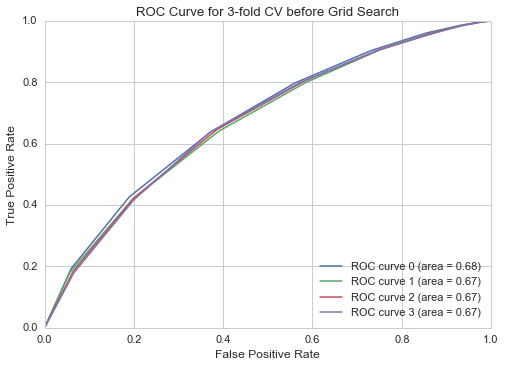

In [32]:
plt.plot(fpr0, tpr0, label='ROC curve 0 (area = %0.2f)' % a0)
plt.plot(fpr1, tpr1, label='ROC curve 1 (area = %0.2f)' % a1)
plt.plot(fpr2, tpr2, label='ROC curve 2 (area = %0.2f)' % a2)
plt.plot(fpr3, tpr3, label='ROC curve 3 (area = %0.2f)' % a3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3-fold CV before Grid Search')
plt.legend(loc="lower right")
plt.show()
plt.savefig("ROC_Curve_woGS")

There is not significant difference between the predictions of each group which means a good sampling and the area under the curve is also considerably high with default parameters of the classifier.

In the next notebook (gs_roc.ipynb) we will evaluate the predictions for different parameters through Grid Search.